## MODEL TRAINING

#### 1.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas Dataframe

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and y variables

In [5]:
X = df.drop(columns=['math score'], axis=1)

In [6]:
y = df['math score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
# Create column Transformer with 3 types of transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
# seperate data into train, test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r_square = r2_score(true, predicted)
    return mae, rmse, r_square

In [20]:
models = {
    'Linear Regressor': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbor Regressor': KNeighborsRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = models[list(models)[i]]
    model.fit(X_train, y_train)  # Train Model

    # Make Predictions
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models)[i])
    print(f"Model: {list(models)[i]}")
    r2_list.append(model_test_r2)

    print('Model Performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R-Squared: {:.4f}'.format(model_train_r2))
    print('---------------------------')
    print('Model Performance for Test Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R-Squared: {:.4f}'.format(model_test_r2))
    print('---------------------------')
    print('')

Model: Linear Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 4.2691
- R-Squared: 0.8741
---------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.4185
- Mean Absolute Error: 4.2234
- R-Squared: 0.8793
---------------------------

Model: Decision Tree Regressor
Model Performance for Training Set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R-Squared: 0.9997
---------------------------
Model Performance for Test Set
- Root Mean Squared Error: 7.9379
- Mean Absolute Error: 6.3800
- R-Squared: 0.7411
---------------------------

Model: Random Forest Regressor
Model Performance for Training Set
- Root Mean Squared Error: 2.2740
- Mean Absolute Error: 1.8068
- R-Squared: 0.9771
---------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.0568
- Mean Absolute Error: 4.6791
- R-Squared: 0.8492
---------------------------

Model: Support Vector Regressor
Model Per

Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R-Sqaured']).sort_values(by=['R-Sqaured'], ascending=False)

,Model Name,R-Sqaured
5,Ridge,0.880593
0,Linear Regressor,0.879345
7,CatBoost Regressor,0.851632
2,Random Forest Regressor,0.849245
8,AdaBoost Regressor,0.846580
4,Lasso,0.825320
6,K-Neighbor Regressor,0.783497
1,Decision Tree Regressor,0.741060
3,Support Vector Regressor,0.728600


Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.93


Plot y_pred and y_test

Text(0, 0.5, 'Predicted Values')

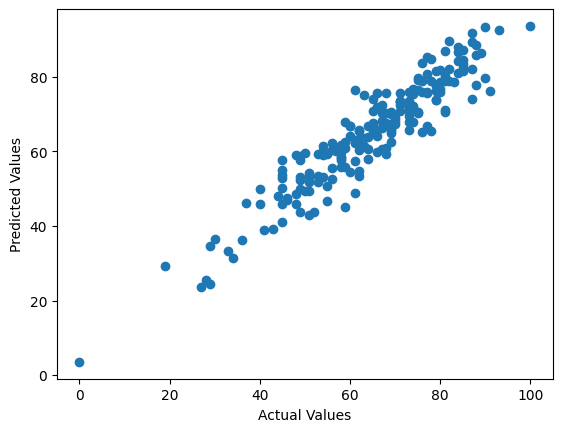

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math score'>

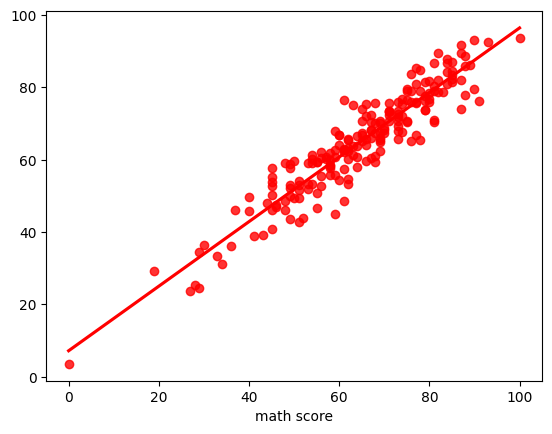

In [24]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

Difference Between Actual and Predicted Values

In [25]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.18750,14.81250
737,53,59.21875,-6.21875
740,80,76.81250,3.18750
660,74,76.81250,-2.81250
411,84,87.96875,-3.96875
...,...,...,...
408,52,43.78125,8.21875
332,62,62.40625,-0.40625
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
